# Hyperparameter Optimization For Xgboost on Cancer-Genome Dataset

In [2]:
# Load packages:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb   
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn import preprocessing

In [3]:
# Step 1: Read the dataset:
Train = pd.read_csv('../Data/Train_Set.csv')
Test = pd.read_csv("../Data/Test_Set.csv")
X_train = Train.iloc[:,0:-1]
X_test = Test.iloc[:,0:-1]


# Encode classes:
le = preprocessing.LabelEncoder()
y_train = Train.iloc[:,-1]
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(Test.iloc[:,-1])

# Step 2: Define parameter grid for Hyperparameter optimization:
parameters={
 'n_estimators'   : [100, 500, 750, 1500], #Amount of trees
 'learning_rate'  : [0.001, 0.01, 0.05, 0.1], # How much do the model update its residuals learn from each trees miscalculation
 'max_depth'          : [1 ,4, 8, 16, 32], # What is the highest amount of nodes on a tree, goes high as there is a lot of parameters
 "colsample_bytree"  : [0.5, 0.8, 0.9], #How big a precentage of columns are sampled for each tree
 'reg_lambda'      : [1, 2, 4],
 'reg_alpha'       : [0, 0.5, 3],
}

# Step 3: Instantiate XGBoost Classifier
random_classifier = xgb.XGBClassifier(
    min_child_weight=1,
    subsample=0.8,
    objective = 'multi:softprob',
    seed=27)
# Step 4: Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(random_classifier, param_distributions=parameters, n_iter=50, cv=5, scoring=['balanced_accuracy','f1_weighted', 'precision_weighted', 'recall_weighted'], refit='balanced_accuracy', random_state=42, verbose=2)

In [4]:
from sklearn.utils import compute_sample_weight
# Step 5: Fit the model
# random_search.fit(X=X_train,
#                   y=y_train,
#                   sample_weight=compute_sample_weight('balanced', y_train), # To inreasingly sample underpresentated classes
#                   verbose=2)
import joblib
#save the results to avoid running in future
# joblib.dump(random_search, '../Data/random_search_object.pkl')
#load your model for further usage
random_search = joblib.load('../Data/random_search_object.pkl')

In [5]:
# Step 6: Evaluate the model
from sklearn.model_selection import cross_val_score
cv_results= pd.DataFrame(random_search.cv_results_)
best_model = random_search.best_estimator_


In [6]:
# Make a prediction matrix
# best_model.fit(X_train, y_train) # Takes just under 3 minutes 

best_model_predict = best_model.predict(X=X_test)
best_model_true_label = y_test

In [7]:
from sklearn.metrics import f1_score

f1_no_optimization = f1_score(y_true = best_model_true_label, y_pred= best_model_predict,average='weighted'  ,sample_weight=compute_sample_weight('balanced', y_test))
print(f"f1 score: {f1_no_optimization}")

from sklearn.metrics import average_precision_score
#PRC_no_optimization = average_precision_score(y_true = best_model_true_label, y_pred= best_model_predict)
#print(f"Precision-Recall AUC of predictions: {PRC_no_optimization}")

from sklearn.metrics import balanced_accuracy_score
BA_Score = balanced_accuracy_score(y_true = best_model_true_label, y_pred= best_model_predict, sample_weight=compute_sample_weight('balanced', y_test))
print(f"Balanced Accuracy Score: {BA_Score}")

f1 score: 0.5881720723536854
Balanced Accuracy Score: 0.5966958336812859


In [66]:
# Plot of non optimized parameters model:
from sklearn.metrics import PrecisionRecallDisplay
# display = PrecisionRecallDisplay.from_estimator(estimator=best_model, X= X_test, y= y_test, name= 'LinearSVC')
# _ = display.ax_.set_title("2-class cancer - Precision-Recall curve")


from sklearn.metrics import RocCurveDisplay
# display = RocCurveDisplay.from_estimator(estimator=best_model, X= X_test, y= y_test, name= 'LinearSVC',)
# _ = display.ax_.set_title("2-class cancer - ROC AUC")


from sklearn.metrics import roc_auc_score


Text(0.5, 1.0, 'Normalized Multiclass Confusion Matrix')

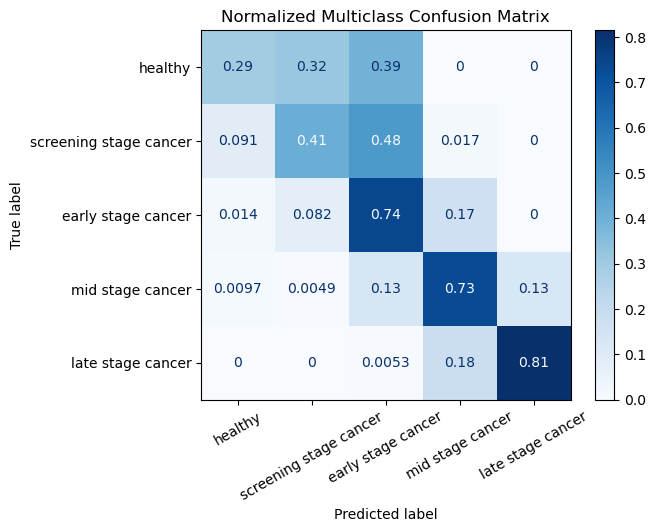

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
    estimator=best_model,
    X = X_test,
    y = y_test,
    labels= [ 1, 4, 0, 3,2],
    display_labels= ['healthy', 'screening stage cancer', 'early stage cancer', 'mid stage cancer', 'late stage cancer'],
    xticks_rotation= 30,
    cmap=plt.cm.Blues,
    
    normalize='true'
    )
disp.ax_.set_title("Normalized Multiclass Confusion Matrix")

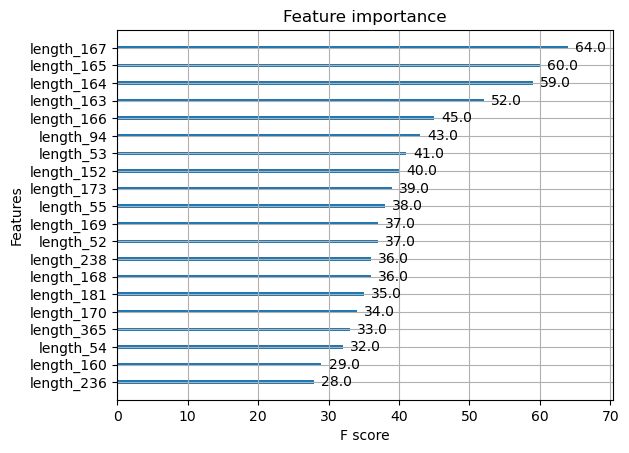

[0.030242348,
 0.029941594,
 0.026725011,
 0.020705344,
 0.018225849,
 0.01788865,
 0.017276423,
 0.017017782,
 0.016596153,
 0.01588403,
 0.015678994,
 0.013989214,
 0.012897272,
 0.012892994,
 0.01052784,
 0.010453022,
 0.010412349,
 0.010167771,
 0.009873126,
 0.009802106,
 0.009598184,
 0.009247446,
 0.008923774,
 0.008852311,
 0.008556197,
 0.008037927,
 0.007656405,
 0.007572384,
 0.0074678473,
 0.007399142,
 0.006656429,
 0.0065447167,
 0.006465545,
 0.006252743,
 0.006075081,
 0.0060456595,
 0.006017373,
 0.005801151,
 0.005746418,
 0.0056615775,
 0.0055040675,
 0.005433535,
 0.0053773113,
 0.005220705,
 0.0052143014,
 0.005182081,
 0.005027537,
 0.0048296433,
 0.004722874,
 0.004664522,
 0.0046466263,
 0.0045895064,
 0.0045596645,
 0.004553137,
 0.004434962,
 0.00442246,
 0.0044033723,
 0.004246258,
 0.004164768,
 0.004108002,
 0.0040666405,
 0.00401291,
 0.003979535,
 0.0039075483,
 0.0038621244,
 0.003852507,
 0.0037924093,
 0.0037705929,
 0.0037000026,
 0.0036513407,
 0.003

In [35]:
xgb.plot_importance(best_model,max_num_features=20)
plt.show()

In [27]:
le.classes_

array(['early stage cancer', 'healthy', 'late stage cancer',
       'mid stage cancer', 'screening stage cancer'], dtype=object)